## **Crack Detection using YOLOv8 and Roboflow**
## First Step

We employ an external GPU to expedite our processes.
We use !nvidia-smi command to achieve this.

> Please make sure to delete all active sessions and restart runtime.
Run the cells one by one.
> Make sure your current run name (path of the files) is the same in code.





In [ ]:
!nvidia-smi

Mon Sep 25 09:25:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install and Use YOLOv8 for segmentation
YOLOv8, or "You Only Look Once," is a computer vision model used for real-time object detection. It is known for its speed and accuracy in detecting objects in images and videos.




In [ ]:

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

##Task1 Data Engineering


Data is the fuel for nearly any kind of image-based detection challenge nowadays. If not used for training (i.e.
the learning of suitable model parameters), a dataset must be present at least for evaluating the performance
of a proposed approach. Thus, the acquisition and preparation of data forms a vital step in designing and
developing a detection system.

### Step 1: Data acquisition

Photos were taken using our mobile phones
(number) of photos were taken.  
*   Legal restrictions were respected during this step.


### Step 2: Roboflow

Roboflow streamlines data preparation for computer vision machine learning projects, offering tools for organization, annotation, transformation, and collaboration.

*   **Annotation** || Roboflow was used to do the annotation. Cracks in each image were highlighted.


*   **Data Split** || Images were split inot 3 different categories (Train set , Validation set and Test set).

<figure>
<center>
<img src='https://raw.githubusercontent.com/Teroxlab/Image-Analysis-and-Object-Recognition-Project/main/Images%20for%20Documentation/data%20split.png' />
<figcaption>Data Splitting</figcaption></center>
</figure>

<figure>
<center>
<img src='https://raw.githubusercontent.com/Teroxlab/Image-Analysis-and-Object-Recognition-Project/main/Images%20for%20Documentation/data%20annotation.png' />
<figcaption>Annotated images using Roboflow</figcaption></center>
</figure>

*   **Augemntation** || To expand our dataset, an augmentation was done by:

*   Flip: Horizontal, Vertical
*   Brightness: Between -39% and +39%
*   Bounding Box: Blur: Up to 1.75px
*   Bounding Box: Noise: Up to 3% of pixels

### Step 3: Preprocessing

*   Images were resized to 640x640 to ensure the consistency
*   Auto-Orient: some annotations would slip away when rotating or flipping.


### Step 4: Exporting dataset
Final step is to export our dataset in an appropriate format.
YOLOv8 format was used, and an API key was acquired.


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kPrkYR1vDrU6V7Fo1ILG")
project = rf.workspace("ssz").project("crack-detection-f5vro")
dataset = project.version(10).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Success

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Crack-detection-10 in yolov8:: 100%|██████████| 718/718 [00:00<00:00, 6804.35it/s]


## Data Training

*   This command is setting up and starting the training of a **YOLOv8**-based model for image segmentation. The goal is to teach the model to understand and label different parts of images, particularly in a dataset related to crack detection. We're going to let the model learn from this data for 25 rounds of training (called epochs). Additionally, we're making sure the images used for training are all resized to be 640 pixels in size. The specifics of how this command works might vary depending on the tools and environment we're using for YOLO models.


*   The epochs parameter specifies the number of complete passes or iterations through the entire training dataset that the YOLO model will undergo during the training process. Each epoch represents one full cycle of training where the model updates its internal parameters based on the training data to improve its performance.


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/datasets/Crack-detection-10/data.yaml epochs=25 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 69.8MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Crack-detection-10/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    results.csv
BoxF1_curve.png					    results.png
BoxP_curve.png					    train_batch0.jpg
BoxPR_curve.png					    train_batch1.jpg
BoxR_curve.png					    train_batch2.jpg
confusion_matrix.png				    train_batch300.jpg
events.out.tfevents.1695635484.307e5927b76f.7342.0  train_batch301.jpg
MaskF1_curve.png				    train_batch302.jpg
MaskP_curve.png					    val_batch0_labels.jpg
MaskPR_curve.png				    val_batch0_pred.jpg
MaskR_curve.png					    weights


##Generating Confusion Matrix
* A confusion matrix is a valuable tool in machine learning and statistics, especially for evaluating the accuracy of a classification algorithm, mainly in supervised learning scenarios. Its purpose is to provide a concise summary of classification outcomes, helping us gauge how well the algorithm performs.
* This matrix consists of two axes: one representing the actual ground truth from our dataset (typically annotated images), and the other indicating the model's predictions based on its training. Ideally, strong agreement between these axes, especially for the same classes, signifies accurate predictions by the model.

/content


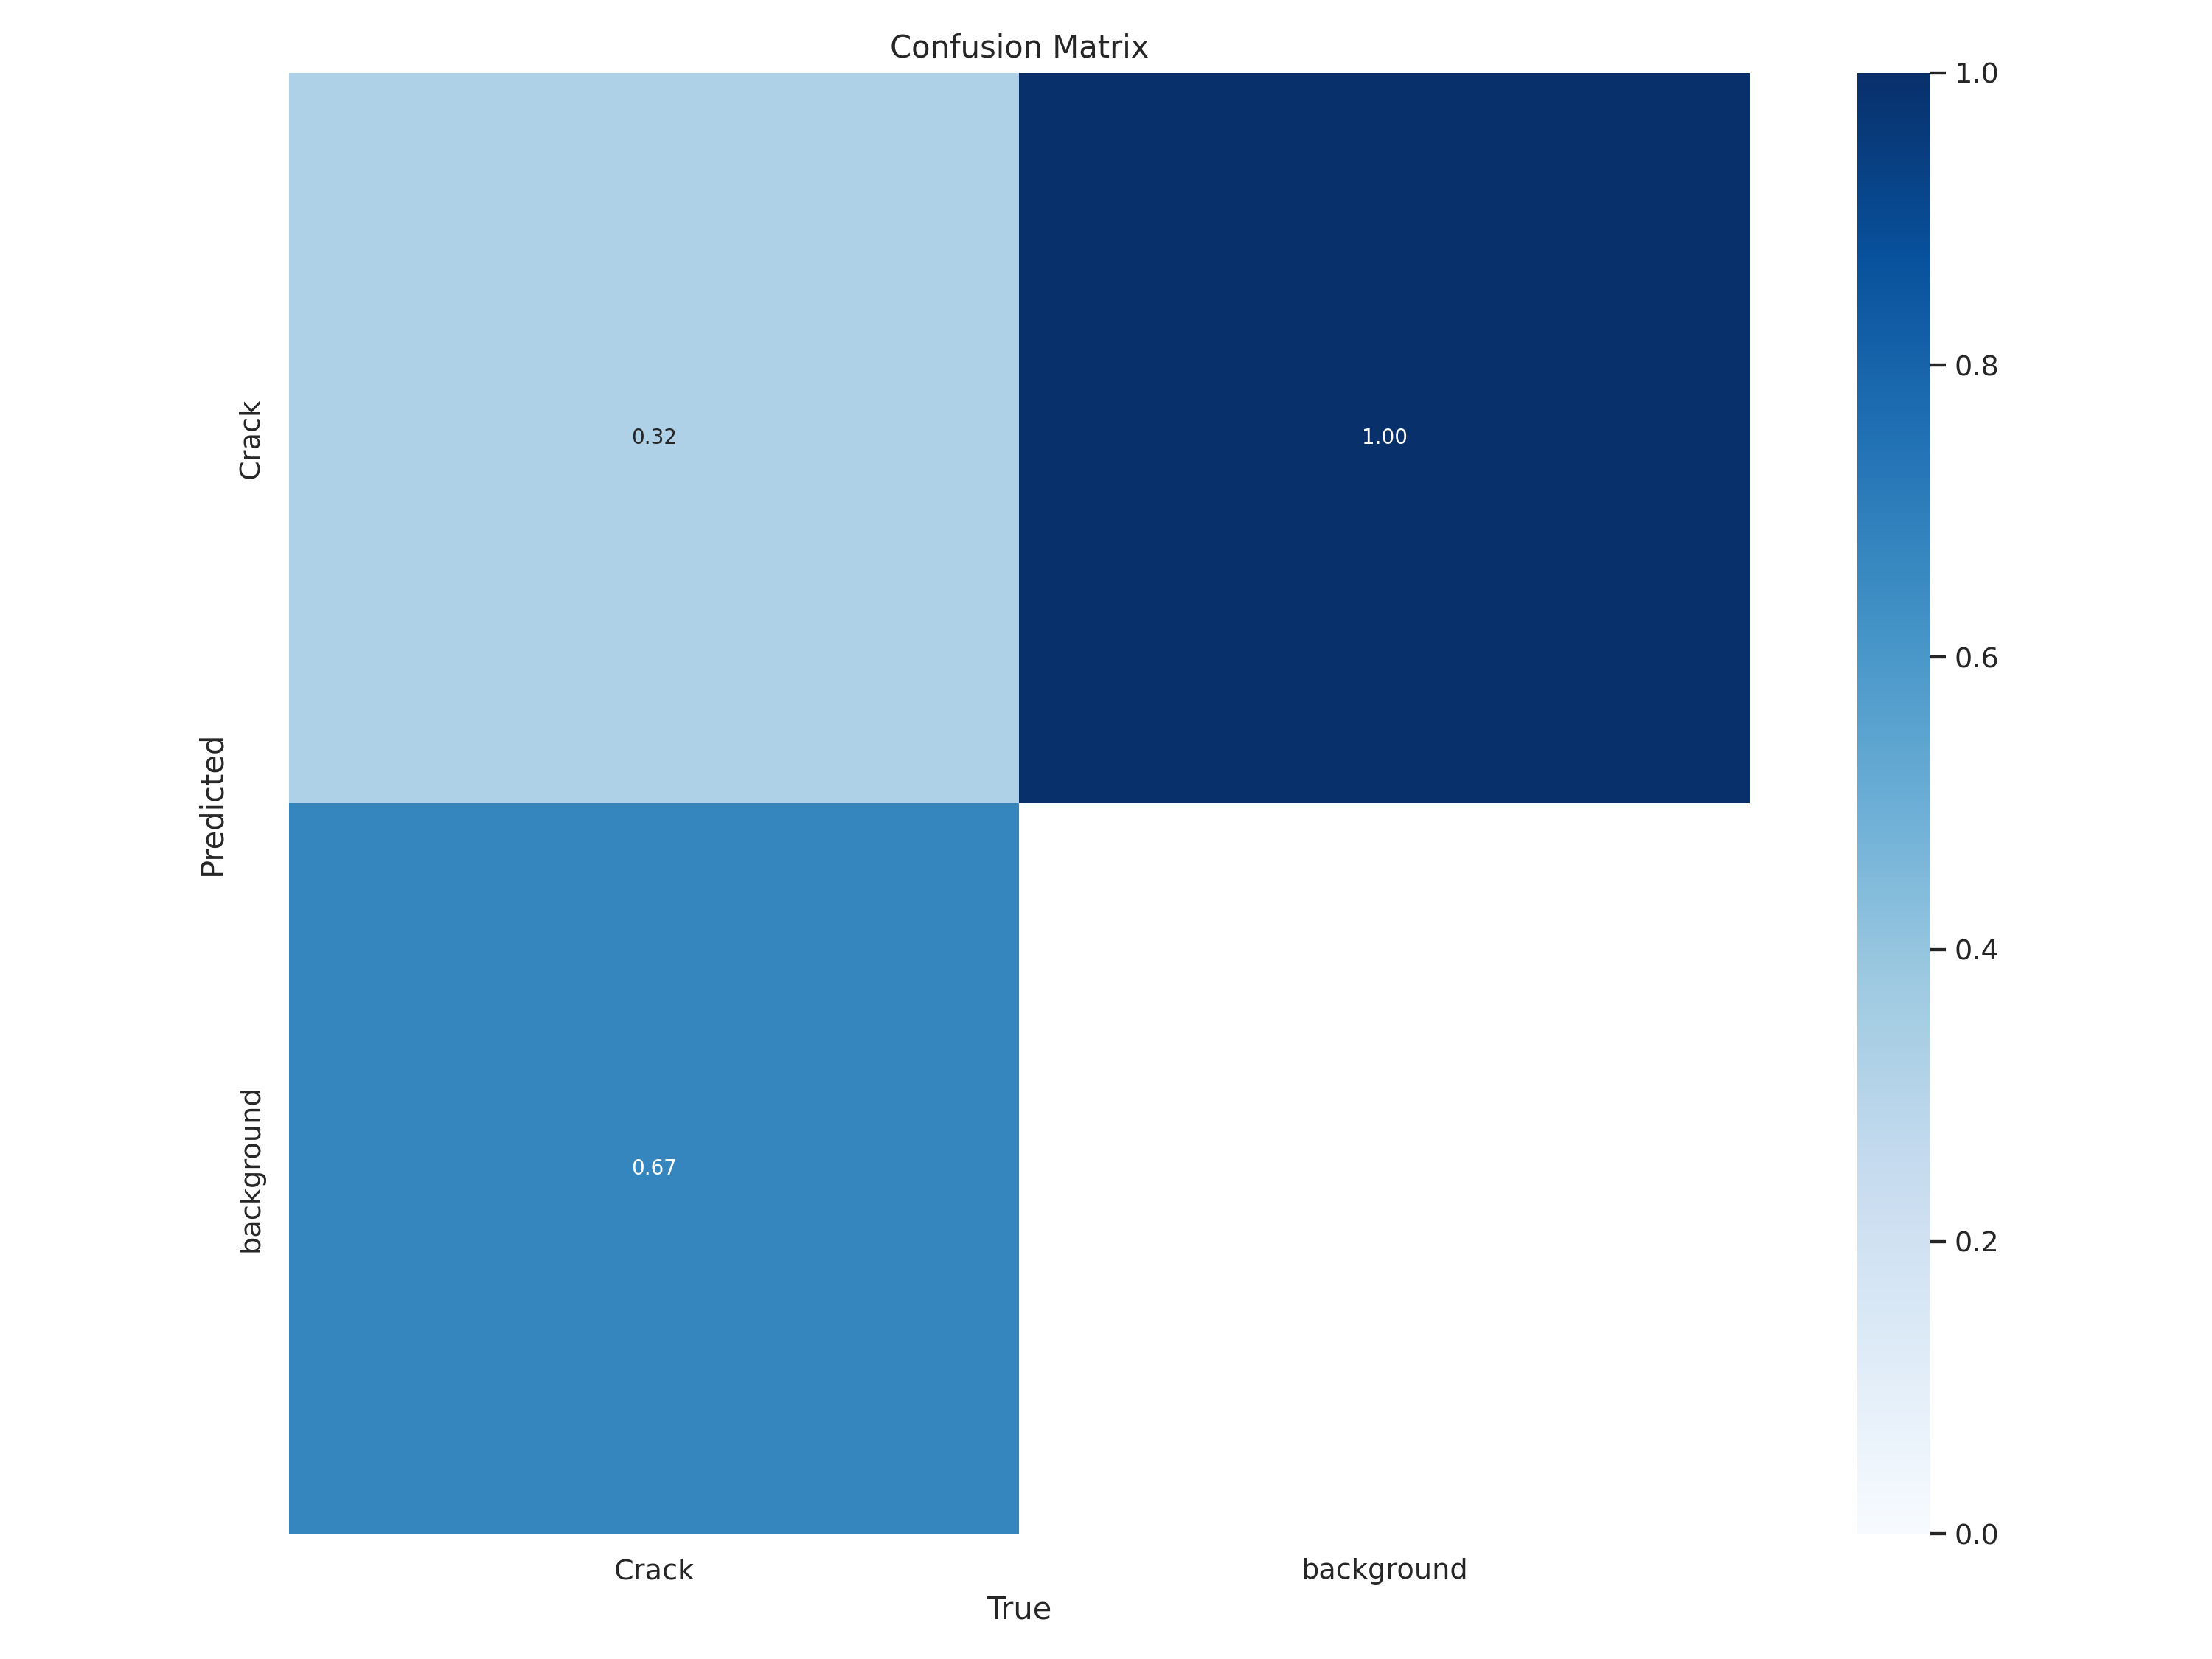

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

## Showing the trained dataset

/content


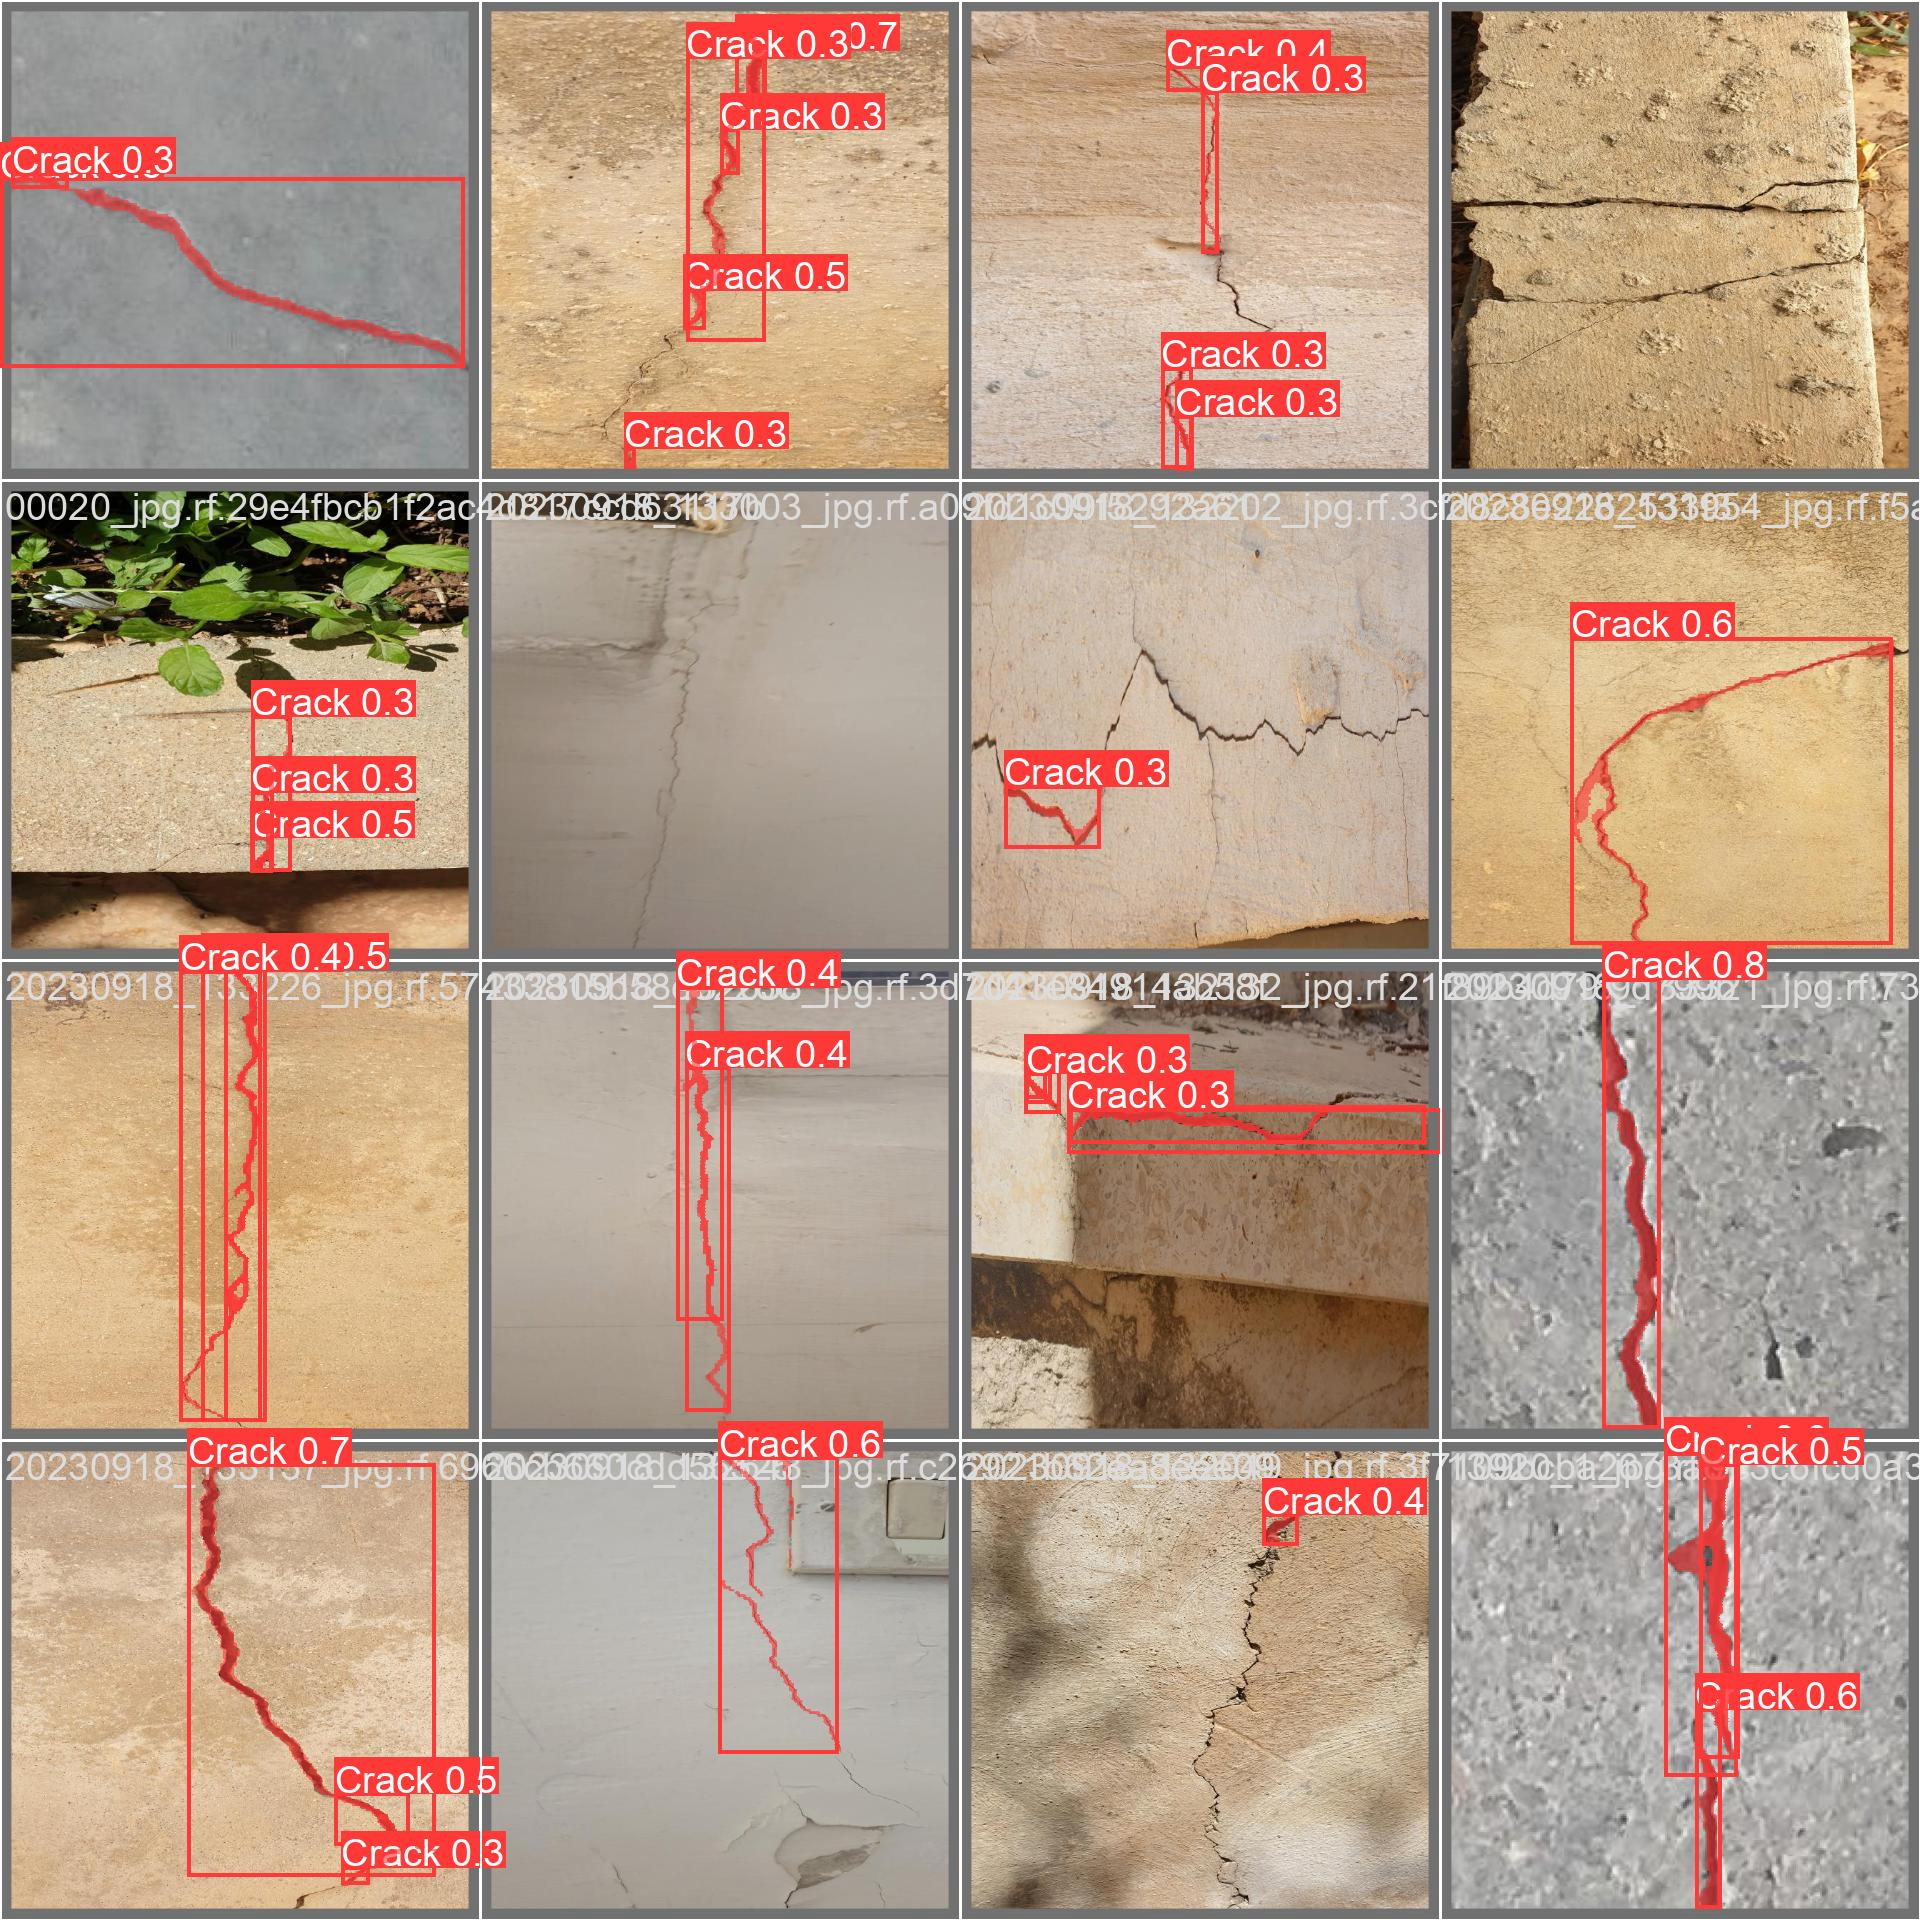

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model
The purpose of validating a custom model is to assess how well the model generalizes to unseen data or performs on a separate dataset that it hasn't been trained on.
* The model will use the (best) set of weights acquired from the training set.

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-25 10:11:36.324277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 10:11:37.201268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Crack-detection-10/valid/labels.cache... 29 images, 1 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.14s/it]
                   all         29         80      0.418      0.312      0.3

## Inference with Custom Model
Now we test our model with test images.
* We used a confidence of 25%. This value can be increased based on how crucial our task is.
*  Additionaly you can upload any image and test it. Make sure to adjust the path of the image in the code.



In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-09-25 10:15:29.454213: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 10:15:30.332903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/15 /content/datasets/Crack-detection-10/test/images/00027_jpg.rf.582fda17029ba4710a3070ac70669ec8.jpg: 640x640 1 Crack, 20.9ms
image 2/15 /content/datasets/Crack-detection-10/test/images/00362_jpg.rf.e14487656b4029ab1d52fa38b7ff6f5e.jpg: 640x640 2 Cracks, 21.0ms
image 3/15 /content/datasets/Crack-detection-10/test/images/00363_jpg.rf.37cc5d0f4bf2a244659498e1ac48a08d.jpg

##Display your test image
Change the path to where the test images were saved (predict##) to display the results.

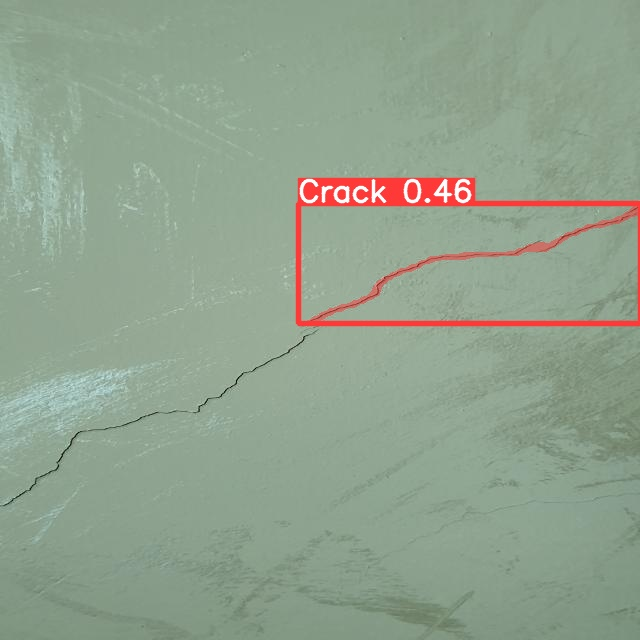

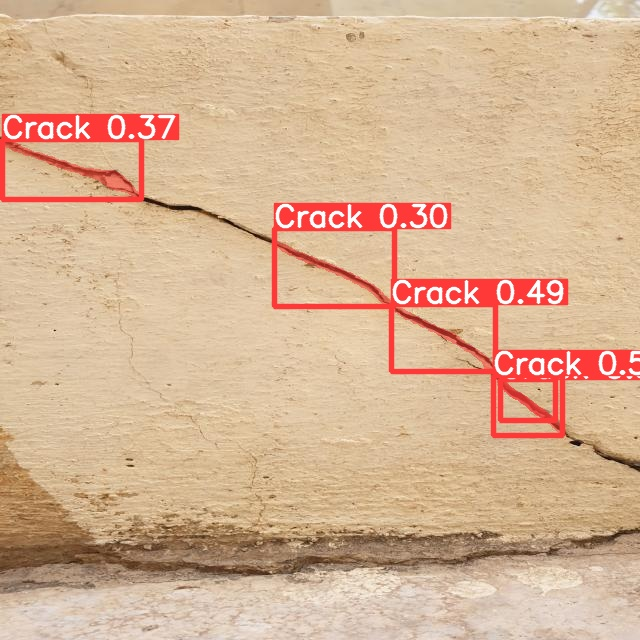

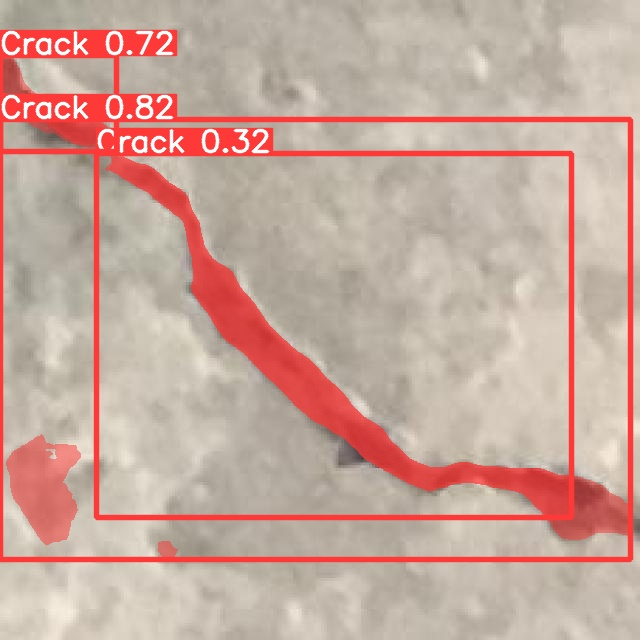

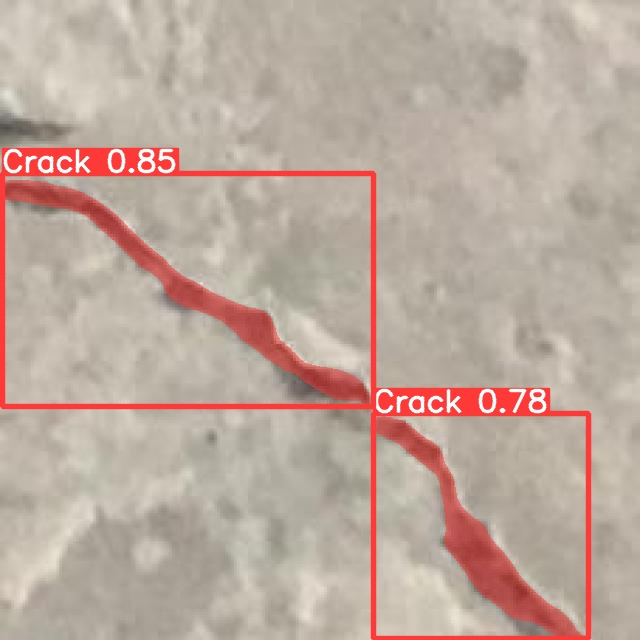

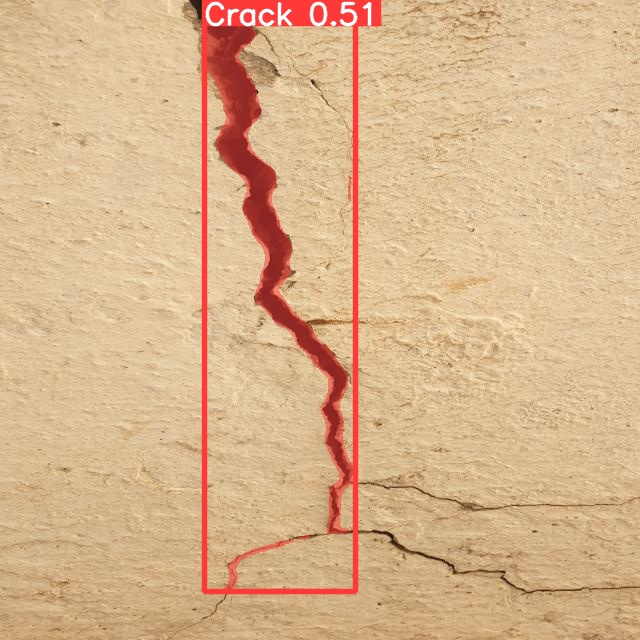

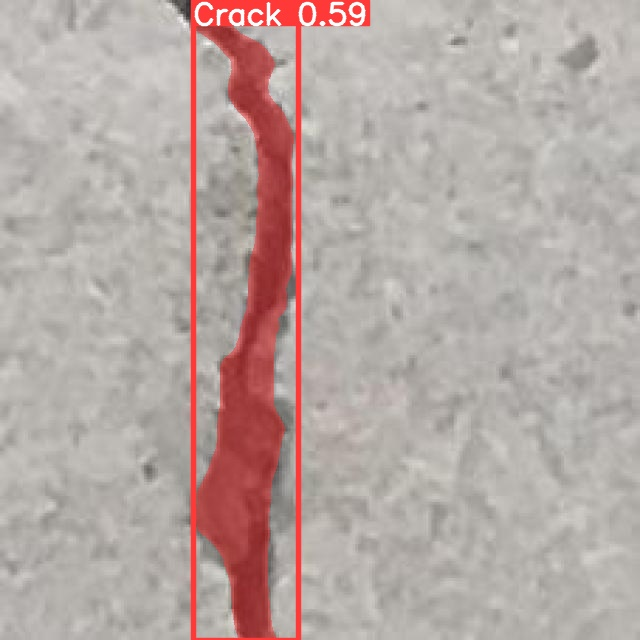

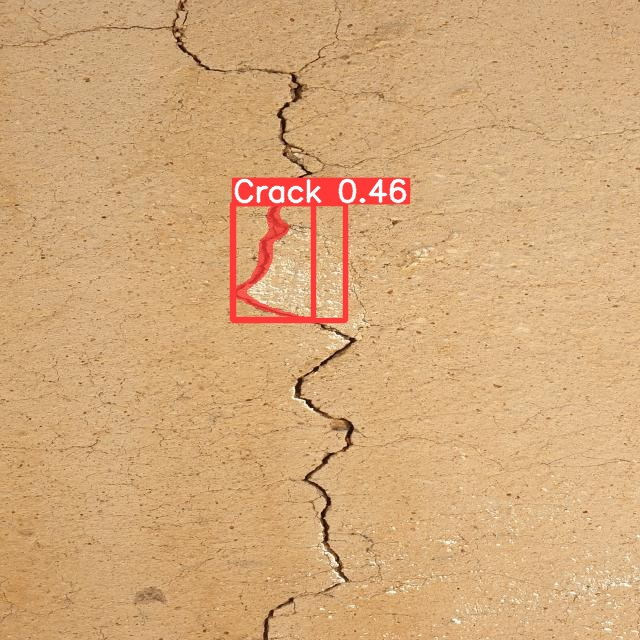

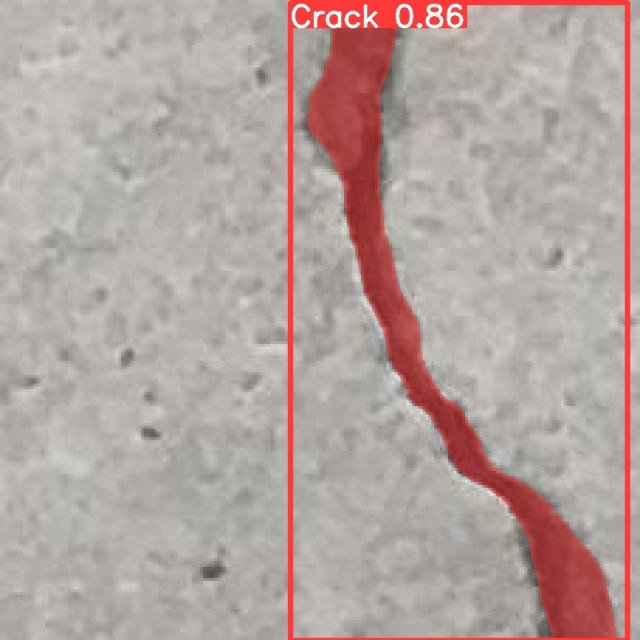

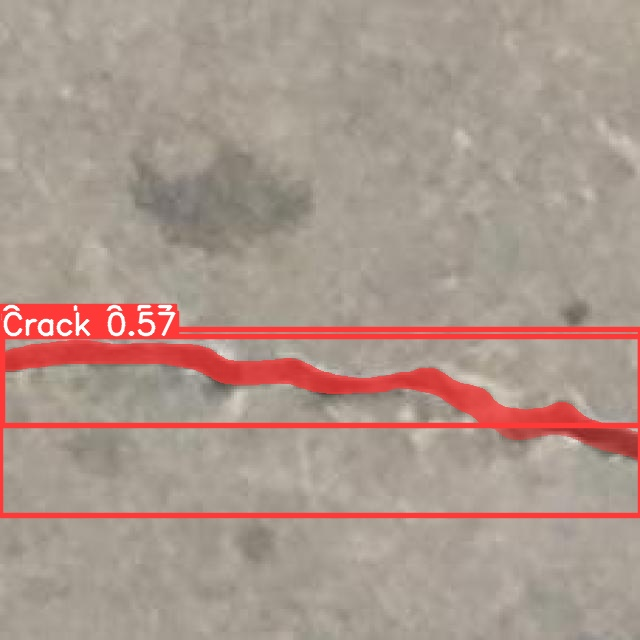

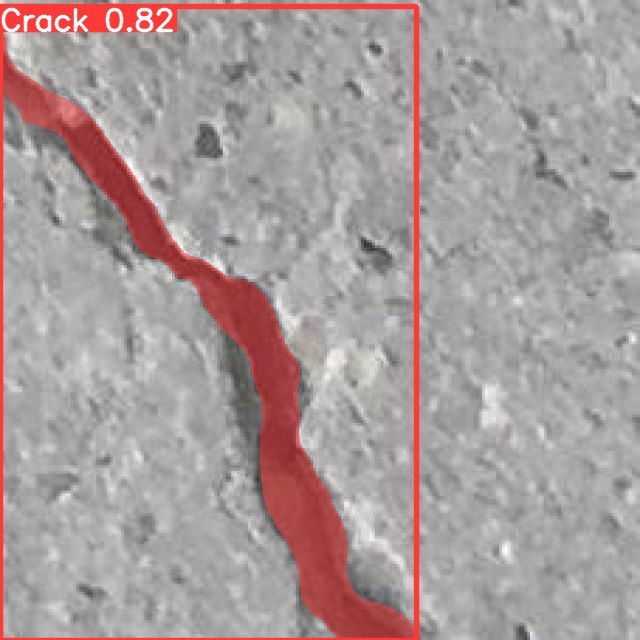

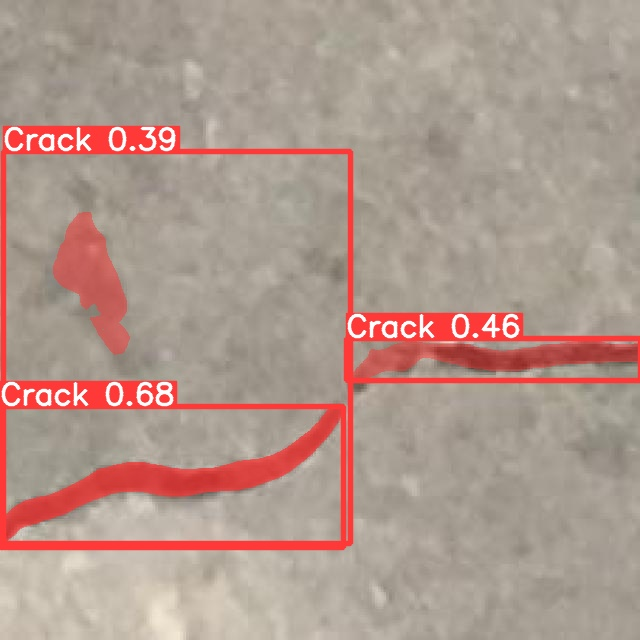

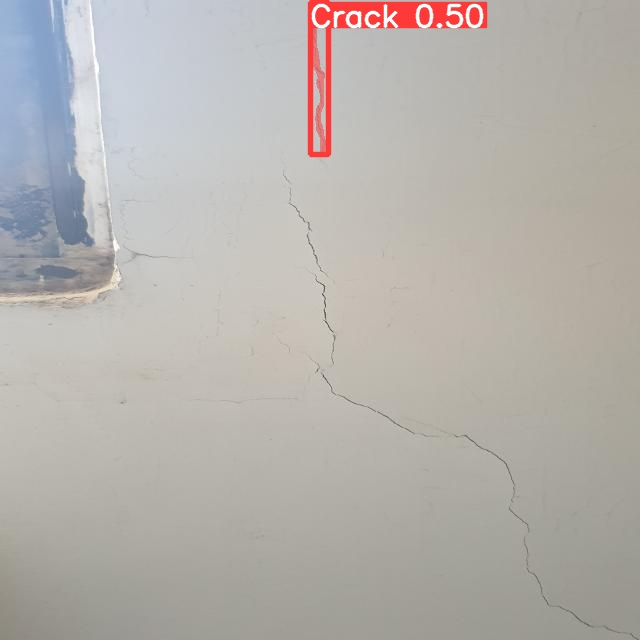

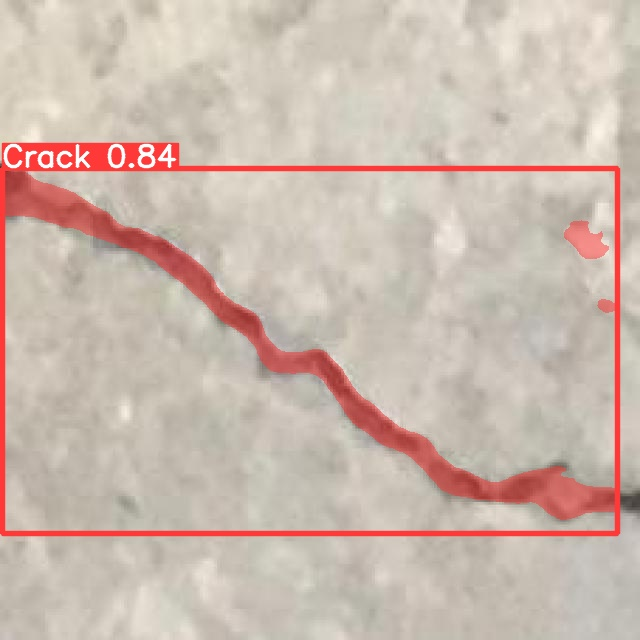

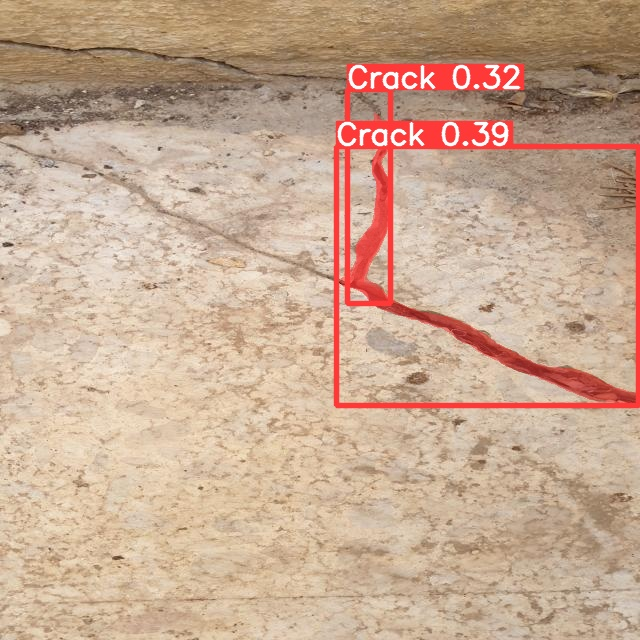

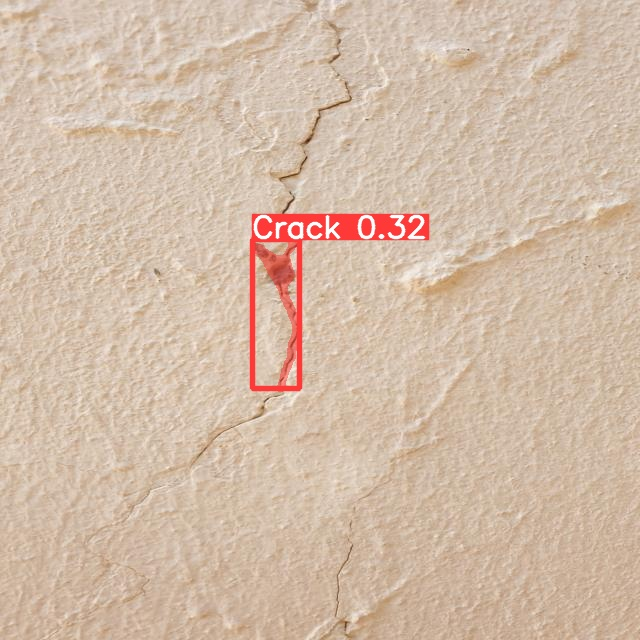

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:]:
      display(Image(filename=image_path, height=600))
      print("\n")

##Download all results content

In [ ]:
!zip -r /content/runs.zip /content/runs

## Interpretaions and Comments
In this project, we employed YOLOv8, a powerful computer vision model, to tackle the critical task of crack detection in structural elements such as walls and beams.
*  In our dataset, some additional images were used in order to increase the accuracy and to train the model in order to avoid underfitting. Images were taken from Kaggle.com, a website for machine learning datasets.
*  Results acquired are not 100% accurate. However, adding more images for training and increasing the number of epochses should result with more accurate outputs.


## References


*   https://www.youtube.com/watch?v=wuZtUMEiKWY&t=1023s&ab_channel=Roboflow
*   https://www.youtube.com/watch?v=aVKGjzAUHz0&t=2s&ab_channel=Computervisionengineer
*   https://www.kaggle.com/

